In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [92]:
path_raw = "dft_rawcount_region_id_6.csv"
path_count = "dft_countpoints_region_id_6.csv"

df_raw = pd.read_csv(path_raw, low_memory=False)
df_count = pd.read_csv(path_count)

In [93]:
print(df_raw.shape)
print(df_count.shape)

(414252, 32)
(3630, 15)


In [94]:
df_raw.head(3)

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6000,S,2000,2000-03-27,7,6,London,57,Barnet,M1,...,5,421,30,5,4,6,11,11.0,67.0,2311.0
1,6000,N,2000,2000-03-27,14,6,London,57,Barnet,M1,...,20,330,66,1,14,14,26,17.0,138.0,1559.0
2,6000,S,2000,2000-03-27,17,6,London,57,Barnet,M1,...,6,64,9,0,1,7,12,2.0,31.0,710.0


In [95]:
df_count.head(3)

,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles
0,999994,6,London,134,Croydon,U,Minor,NaN,NaN,531750,165000,51.368786,-0.108705,NaN,NaN
1,999993,6,London,134,Croydon,U,Minor,NaN,NaN,531050,157500,51.301545,-0.121511,NaN,NaN
2,999990,6,London,109,Westminster,B310,Minor,NaN,NaN,528194,179375,51.498787,-0.154563,NaN,NaN


In [96]:
print(df_raw.duplicated().sum())
print(df_count.duplicated().sum())

0
0


<b>No Duplicates</b>

In [98]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414252 entries, 0 to 414251
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                414252 non-null  int64  
 1   direction_of_travel           414252 non-null  object 
 2   year                          414252 non-null  int64  
 3   count_date                    414252 non-null  object 
 4   hour                          414252 non-null  int64  
 5   region_id                     414252 non-null  int64  
 6   region_name                   414252 non-null  object 
 7   local_authority_id            414252 non-null  int64  
 8   local_authority_name          414252 non-null  object 
 9   road_name                     414252 non-null  object 
 10  road_type                     414252 non-null  object 
 11  start_junction_road_name      231624 non-null  object 
 12  end_junction_road_name        231624 non-nul

In [99]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   count_point_id            3630 non-null   int64  
 1   region_id                 3630 non-null   int64  
 2   region_name               3630 non-null   object 
 3   local_authority_id        3630 non-null   int64  
 4   local_authority_name      3630 non-null   object 
 5   road_name                 3630 non-null   object 
 6   road_type                 3630 non-null   object 
 7   start_junction_road_name  1985 non-null   object 
 8   end_junction_road_name    1985 non-null   object 
 9   easting                   3630 non-null   int64  
 10  northing                  3630 non-null   int64  
 11  latitude                  3630 non-null   float64
 12  longitude                 3630 non-null   float64
 13  link_length_km            1988 non-null   float64
 14  link_len

## Merge Dataframes

In [101]:
df_merged = pd.merge(
    left = df_raw,
    right = df_count,
    how = "left",
    on = "count_point_id",
    suffixes=('_raw', '_count')
)

In [102]:
df_merged.shape

(414252, 46)

In [103]:
df_merged.duplicated().sum()

0

# Null Values

### Null Percentage

In [106]:
df_merged.isnull().sum()

count_point_id                         0
direction_of_travel                    0
year                                   0
count_date                             0
hour                                   0
region_id_raw                          0
region_name_raw                        0
local_authority_id_raw                 0
local_authority_name_raw               0
road_name_raw                          0
road_type_raw                          0
start_junction_road_name_raw      182628
end_junction_road_name_raw        182628
easting_raw                            0
northing_raw                           0
latitude_raw                           0
longitude_raw                          0
link_length_km_raw                182556
link_length_miles_raw             182556
pedal_cycles                           0
two_wheeled_motor_vehicles             0
cars_and_taxis                         0
buses_and_coaches                      0
lgvs                                   0
hgvs_2_rigid_axl

In [107]:
all_null_columns = ["start_junction_road_name_count", "end_junction_road_name_count", "link_length_km_count", "link_length_miles_count",
"start_junction_road_name_raw", "end_junction_road_name_raw", 
"hgvs_6_articulated_axle", "all_hgvs", "all_motor_vehicles",
"link_length_km_raw", "link_length_miles_raw"]

In [108]:
df_merged[all_null_columns].dtypes

start_junction_road_name_count     object
end_junction_road_name_count       object
link_length_km_count              float64
link_length_miles_count           float64
start_junction_road_name_raw       object
end_junction_road_name_raw         object
hgvs_6_articulated_axle           float64
all_hgvs                          float64
all_motor_vehicles                float64
link_length_km_raw                float64
link_length_miles_raw             float64
dtype: object

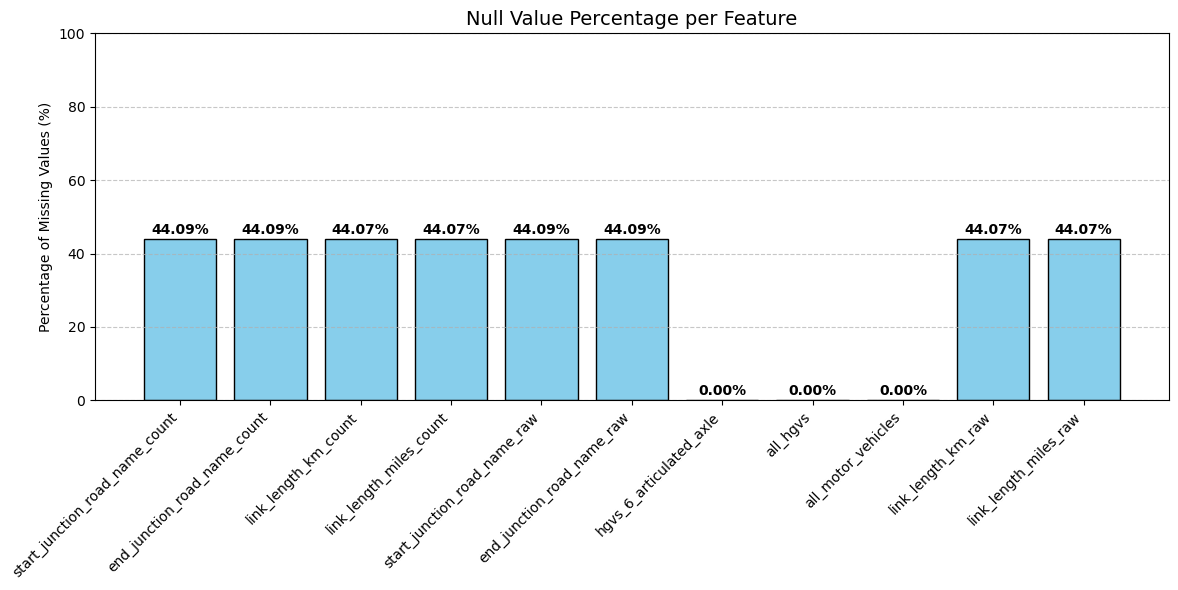

In [109]:
null_series = df_copy[all_null_columns].isnull().sum()

total_rows = len(df_copy)

# Calculate null percentage
null_percent = (null_series / total_rows) * 100

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(null_percent.index, null_percent, color='skyblue', edgecolor='black')

# Annotate percentage on top of bars
for bar, pct in zip(bars, null_percent):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{pct:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Null Value Percentage per Feature", fontsize=14)
plt.ylabel("Percentage of Missing Values (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Y-axis in percentage terms
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
print(f"Null Value Percentage: {1/(len(df_copy)) * 100 :.5f}%")

Null Value Percentage: 0.00024%


### Drop Columns

In [112]:
repeated_columns = [
    "region_id_count", "region_name_count", "local_authority_id_count", 
    "local_authority_name_count", "road_name_count", "road_type_count", 
    "easting_count", "northing_count", "latitude_count", "longitude_count",
    "link_length_km_count", "link_length_miles_count",
    "start_junction_road_name_count", "end_junction_road_name_count"
]

useless_null_columns = [
    "start_junction_road_name_raw", "end_junction_road_name_raw"
]

df_clean = df_merged.drop(columns=repeated_columns + useless_null_columns)

### Impute 1 Null Value in 3 columns

In [114]:
small_null_cols = ["hgvs_6_articulated_axle", "all_hgvs", "all_motor_vehicles"]

for col in small_null_cols:
    mean_value = df_clean[col].mean()
    df_clean[col].fillna(mean_value, inplace=True)

C:\Users\91741\AppData\Local\Temp\ipykernel_20068\3244064416.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mean_value, inplace=True)


### Impute 44% of data

In [115]:
big_null_cols = ["link_length_km_raw", "link_length_miles_raw"]

for col in big_null_cols:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

C:\Users\91741\AppData\Local\Temp\ipykernel_20068\972501844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)
C:\Users\91741\AppData\Local\Temp\ipykernel_20068\972501844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [116]:
print(df_clean.isnull().sum().sum())
print(df_clean.duplicated().sum())

0
0


In [117]:
df_clean.to_csv("df_clean.csv", index=False)

In [118]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414252 entries, 0 to 414251
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                414252 non-null  int64  
 1   direction_of_travel           414252 non-null  object 
 2   year                          414252 non-null  int64  
 3   count_date                    414252 non-null  object 
 4   hour                          414252 non-null  int64  
 5   region_id_raw                 414252 non-null  int64  
 6   region_name_raw               414252 non-null  object 
 7   local_authority_id_raw        414252 non-null  int64  
 8   local_authority_name_raw      414252 non-null  object 
 9   road_name_raw                 414252 non-null  object 
 10  road_type_raw                 414252 non-null  object 
 11  easting_raw                   414252 non-null  int64  
 12  northing_raw                  414252 non-nul